In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
#Extracting The Dataset
df=pd.read_excel("Churn (1) (1).xlsx")
df

,Unnamed: 0,state,area.code,account.length,voice.plan,voice.messages,intl.plan,intl.mins,intl.calls,intl.charge,...,day.calls,day.charge,eve.mins,eve.calls,eve.charge,night.mins,night.calls,night.charge,customer.calls,churn
0,1,KS,area_code_415,128,yes,25,no,10.0,3,2.70,...,110,45.07,197.4,99,16.78,244.7,91,11.01,1,no
1,2,OH,area_code_415,107,yes,26,no,13.7,3,3.70,...,123,27.47,195.5,103,16.62,254.4,103,11.45,1,no
2,3,NJ,area_code_415,137,no,0,no,12.2,5,3.29,...,114,41.38,121.2,110,10.30,162.6,104,7.32,0,no
3,4,OH,area_code_408,84,no,0,yes,6.6,7,1.78,...,71,50.9,61.9,88,5.26,196.9,89,8.86,2,no
4,5,OK,area_code_415,75,no,0,yes,10.1,3,2.73,...,113,28.34,148.3,122,12.61,186.9,121,8.41,3,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4996,HI,area_code_408,50,yes,40,no,9.9,5,2.67,...,127,40.07,223,126,18.96,297.5,116,13.39,2,no
4996,4997,WV,area_code_415,152,no,0,no,14.7,2,3.97,...,90,31.31,256.8,73,21.83,213.6,113,9.61,3,yes
4997,4998,DC,area_code_415,61,no,0,no,13.6,4,3.67,...,89,23.9,172.8,128,14.69,212.4,97,9.56,1,no
4998,4999,DC,area_code_510,109,no,0,no,8.5,6,2.30,...,67,32.1,171.7,92,14.59,224.4,89,10.10,0,no


In [4]:
df.head()

,Unnamed: 0,state,area.code,account.length,voice.plan,voice.messages,intl.plan,intl.mins,intl.calls,intl.charge,...,day.calls,day.charge,eve.mins,eve.calls,eve.charge,night.mins,night.calls,night.charge,customer.calls,churn
0,1,KS,area_code_415,128,yes,25,no,10.0,3,2.70,...,110,45.07,197.4,99,16.78,244.7,91,11.01,1,no
1,2,OH,area_code_415,107,yes,26,no,13.7,3,3.70,...,123,27.47,195.5,103,16.62,254.4,103,11.45,1,no
2,3,NJ,area_code_415,137,no,0,no,12.2,5,3.29,...,114,41.38,121.2,110,10.30,162.6,104,7.32,0,no
3,4,OH,area_code_408,84,no,0,yes,6.6,7,1.78,...,71,50.9,61.9,88,5.26,196.9,89,8.86,2,no
4,5,OK,area_code_415,75,no,0,yes,10.1,3,2.73,...,113,28.34,148.3,122,12.61,186.9,121,8.41,3,no


In [5]:
df.tail()

,Unnamed: 0,state,area.code,account.length,voice.plan,voice.messages,intl.plan,intl.mins,intl.calls,intl.charge,...,day.calls,day.charge,eve.mins,eve.calls,eve.charge,night.mins,night.calls,night.charge,customer.calls,churn
4995,4996,HI,area_code_408,50,yes,40,no,9.9,5,2.67,...,127,40.07,223,126,18.96,297.5,116,13.39,2,no
4996,4997,WV,area_code_415,152,no,0,no,14.7,2,3.97,...,90,31.31,256.8,73,21.83,213.6,113,9.61,3,yes
4997,4998,DC,area_code_415,61,no,0,no,13.6,4,3.67,...,89,23.9,172.8,128,14.69,212.4,97,9.56,1,no
4998,4999,DC,area_code_510,109,no,0,no,8.5,6,2.30,...,67,32.1,171.7,92,14.59,224.4,89,10.10,0,no
4999,5000,VT,area_code_415,86,yes,34,no,9.3,16,2.51,...,102,22,267.1,104,22.70,154.8,100,6.97,0,no


# EDA

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      5000 non-null   int64  
 1   state           5000 non-null   object 
 2   area.code       5000 non-null   object 
 3   account.length  5000 non-null   int64  
 4   voice.plan      5000 non-null   object 
 5   voice.messages  5000 non-null   int64  
 6   intl.plan       5000 non-null   object 
 7   intl.mins       5000 non-null   float64
 8   intl.calls      5000 non-null   int64  
 9   intl.charge     5000 non-null   float64
 10  day.mins        5000 non-null   float64
 11  day.calls       5000 non-null   int64  
 12  day.charge      5000 non-null   object 
 13  eve.mins        5000 non-null   object 
 14  eve.calls       5000 non-null   int64  
 15  eve.charge      5000 non-null   float64
 16  night.mins      5000 non-null   float64
 17  night.calls     5000 non-null   i

In [8]:
df.describe()

,Unnamed: 0,account.length,voice.messages,intl.mins,intl.calls,intl.charge,day.mins,day.calls,eve.calls,eve.charge,night.mins,night.calls,night.charge,customer.calls
count,5000.000000,5000.00000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,2500.500000,100.25860,7.755200,10.261780,4.435200,2.771196,180.288900,100.029400,100.191000,17.054322,200.391620,99.919200,9.017732,1.570400
std,1443.520003,39.69456,13.546393,2.761396,2.456788,0.745514,53.894699,19.831197,19.826496,4.296843,50.527789,19.958686,2.273763,1.306363
min,1.000000,1.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1250.750000,73.00000,0.000000,8.500000,3.000000,2.300000,143.700000,87.000000,87.000000,14.140000,166.900000,87.000000,7.510000,1.000000
50%,2500.500000,100.00000,0.000000,10.300000,4.000000,2.780000,180.100000,100.000000,100.000000,17.090000,200.400000,100.000000,9.020000,1.000000
75%,3750.250000,127.00000,17.000000,12.000000,6.000000,3.240000,216.200000,113.000000,114.000000,19.900000,234.700000,113.000000,10.560000,2.000000
max,5000.000000,243.00000,52.000000,20.000000,20.000000,5.400000,351.500000,165.000000,170.000000,30.910000,395.000000,175.000000,17.770000,9.000000


In [9]:
df.shape

(5000, 21)

In [10]:
df.columns

Index(['Unnamed: 0', 'state', 'area.code', 'account.length', 'voice.plan',
       'voice.messages', 'intl.plan', 'intl.mins', 'intl.calls', 'intl.charge',
       'day.mins', 'day.calls', 'day.charge', 'eve.mins', 'eve.calls',
       'eve.charge', 'night.mins', 'night.calls', 'night.charge',
       'customer.calls', 'churn'],
      dtype='object')

In [11]:
df.duplicated().sum()

0

In [12]:
df.dtypes

Unnamed: 0          int64
state              object
area.code          object
account.length      int64
voice.plan         object
voice.messages      int64
intl.plan          object
intl.mins         float64
intl.calls          int64
intl.charge       float64
day.mins          float64
day.calls           int64
day.charge         object
eve.mins           object
eve.calls           int64
eve.charge        float64
night.mins        float64
night.calls         int64
night.charge      float64
customer.calls      int64
churn              object
dtype: object

In [13]:
df.drop('Unnamed: 0',axis=1, inplace=True)
df

,state,area.code,account.length,voice.plan,voice.messages,intl.plan,intl.mins,intl.calls,intl.charge,day.mins,day.calls,day.charge,eve.mins,eve.calls,eve.charge,night.mins,night.calls,night.charge,customer.calls,churn
0,KS,area_code_415,128,yes,25,no,10.0,3,2.70,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,1,no
1,OH,area_code_415,107,yes,26,no,13.7,3,3.70,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,1,no
2,NJ,area_code_415,137,no,0,no,12.2,5,3.29,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,0,no
3,OH,area_code_408,84,no,0,yes,6.6,7,1.78,299.4,71,50.9,61.9,88,5.26,196.9,89,8.86,2,no
4,OK,area_code_415,75,no,0,yes,10.1,3,2.73,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,3,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,HI,area_code_408,50,yes,40,no,9.9,5,2.67,235.7,127,40.07,223,126,18.96,297.5,116,13.39,2,no
4996,WV,area_code_415,152,no,0,no,14.7,2,3.97,184.2,90,31.31,256.8,73,21.83,213.6,113,9.61,3,yes
4997,DC,area_code_415,61,no,0,no,13.6,4,3.67,140.6,89,23.9,172.8,128,14.69,212.4,97,9.56,1,no
4998,DC,area_code_510,109,no,0,no,8.5,6,2.30,188.8,67,32.1,171.7,92,14.59,224.4,89,10.10,0,no


In [14]:
df['area.code'].value_counts()

area.code
area_code_415    2495
area_code_408    1259
area_code_510    1246
Name: count, dtype: int64

In [15]:
##checking if any columns has missing values
df.isnull().sum()

state             0
area.code         0
account.length    0
voice.plan        0
voice.messages    0
intl.plan         0
intl.mins         0
intl.calls        0
intl.charge       0
day.mins          0
day.calls         0
day.charge        0
eve.mins          0
eve.calls         0
eve.charge        0
night.mins        0
night.calls       0
night.charge      0
customer.calls    0
churn             0
dtype: int64

<Axes: >

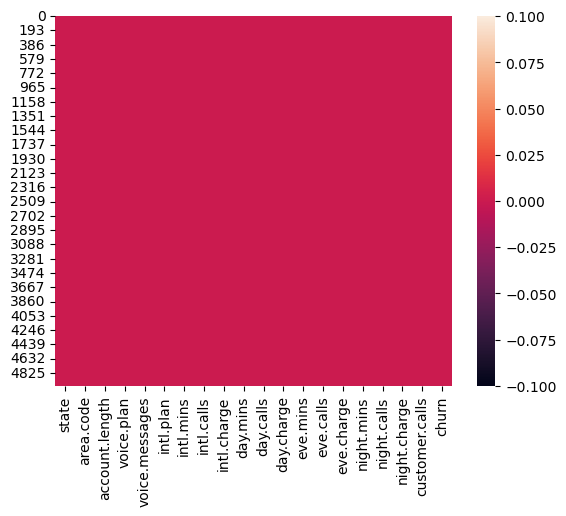

In [16]:
sns.heatmap(df.isnull())

In [17]:
# here we have to change the data types object to float
df['day.charge'] = df['day.charge'].astype(float)
df['eve.mins'] = df['eve.mins'].astype(float)

In [18]:
##checking if any columns has missing values
df.isnull().sum()

state              0
area.code          0
account.length     0
voice.plan         0
voice.messages     0
intl.plan          0
intl.mins          0
intl.calls         0
intl.charge        0
day.mins           0
day.calls          0
day.charge         7
eve.mins          24
eve.calls          0
eve.charge         0
night.mins         0
night.calls        0
night.charge       0
customer.calls     0
churn              0
dtype: int64

In [19]:
df['day.charge']=df['day.charge'].fillna(df['day.charge'].mean())
df['eve.mins']=df['eve.mins'].fillna(df['eve.mins'].mean())

In [20]:
##checking if any columns has missing values
df.isnull().sum()

state             0
area.code         0
account.length    0
voice.plan        0
voice.messages    0
intl.plan         0
intl.mins         0
intl.calls        0
intl.charge       0
day.mins          0
day.calls         0
day.charge        0
eve.mins          0
eve.calls         0
eve.charge        0
night.mins        0
night.calls       0
night.charge      0
customer.calls    0
churn             0
dtype: int64

In [21]:
df.dtypes

state              object
area.code          object
account.length      int64
voice.plan         object
voice.messages      int64
intl.plan          object
intl.mins         float64
intl.calls          int64
intl.charge       float64
day.mins          float64
day.calls           int64
day.charge        float64
eve.mins          float64
eve.calls           int64
eve.charge        float64
night.mins        float64
night.calls         int64
night.charge      float64
customer.calls      int64
churn              object
dtype: object

In [22]:
df

,state,area.code,account.length,voice.plan,voice.messages,intl.plan,intl.mins,intl.calls,intl.charge,day.mins,day.calls,day.charge,eve.mins,eve.calls,eve.charge,night.mins,night.calls,night.charge,customer.calls,churn
0,KS,area_code_415,128,yes,25,no,10.0,3,2.70,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,1,no
1,OH,area_code_415,107,yes,26,no,13.7,3,3.70,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,1,no
2,NJ,area_code_415,137,no,0,no,12.2,5,3.29,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,0,no
3,OH,area_code_408,84,no,0,yes,6.6,7,1.78,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,2,no
4,OK,area_code_415,75,no,0,yes,10.1,3,2.73,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,3,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,HI,area_code_408,50,yes,40,no,9.9,5,2.67,235.7,127,40.07,223.0,126,18.96,297.5,116,13.39,2,no
4996,WV,area_code_415,152,no,0,no,14.7,2,3.97,184.2,90,31.31,256.8,73,21.83,213.6,113,9.61,3,yes
4997,DC,area_code_415,61,no,0,no,13.6,4,3.67,140.6,89,23.90,172.8,128,14.69,212.4,97,9.56,1,no
4998,DC,area_code_510,109,no,0,no,8.5,6,2.30,188.8,67,32.10,171.7,92,14.59,224.4,89,10.10,0,no


In [23]:
# Encode the object variable

target_column = 'churn' 
if target_column in df.columns:
    from sklearn.preprocessing import LabelEncoder
    le = LabelEncoder()
    df[target_column] = le.fit_transform(df[target_column])
    print(f"\nEncoded target variable '{target_column}' with mapping: {dict(enumerate(le.classes_))}")
else:
    print(f"\nTarget column '{target_column}' not found in the dataset.")


Encoded target variable 'churn' with mapping: {0: 'no', 1: 'yes'}


In [24]:
# Encode the oject variable

target_column = 'voice.plan'
if target_column in df.columns:
    from sklearn.preprocessing import LabelEncoder
    le = LabelEncoder()
    df[target_column] = le.fit_transform(df[target_column])
    print(f"\nEncoded target variable '{target_column}' with mapping: {dict(enumerate(le.classes_))}")
else:
    print(f"\nTarget column '{target_column}' not found in the dataset.")


Encoded target variable 'voice.plan' with mapping: {0: 'no', 1: 'yes'}


In [25]:
# Encode the object variable
target_column = 'intl.plan' 
if target_column in df.columns:
    from sklearn.preprocessing import LabelEncoder
    le = LabelEncoder()
    df[target_column] = le.fit_transform(df[target_column])
    print(f"\nEncoded target variable '{target_column}' with mapping: {dict(enumerate(le.classes_))}")
else:
    print(f"\nTarget column '{target_column}' not found in the dataset.")


Encoded target variable 'intl.plan' with mapping: {0: 'no', 1: 'yes'}


In [26]:
# labeling the remaining columns 
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(sparse_output=False,handle_unknown='ignore')
ohe_v = pd.DataFrame(ohe.fit_transform(df[['voice.plan']]),columns=['voice.plan1','voice.plan2'])
ohe_intl = pd.DataFrame(ohe.fit_transform(df[['intl.plan']]),columns=['intl.plan1','intl.plan2'])
ohe_area = pd.DataFrame(ohe.fit_transform(df[['area.code']]),columns=['area_code_415','area_code_408','area_code_510'])

In [27]:
ohe_v

,voice.plan1,voice.plan2
0,0.0,1.0
1,0.0,1.0
2,1.0,0.0
3,1.0,0.0
4,1.0,0.0
...,...,...
4995,0.0,1.0
4996,1.0,0.0
4997,1.0,0.0
4998,1.0,0.0


In [28]:
ohe_intl

,intl.plan1,intl.plan2
0,1.0,0.0
1,1.0,0.0
2,1.0,0.0
3,0.0,1.0
4,0.0,1.0
...,...,...
4995,1.0,0.0
4996,1.0,0.0
4997,1.0,0.0
4998,1.0,0.0


In [29]:
ohe_area

,area_code_415,area_code_408,area_code_510
0,0.0,1.0,0.0
1,0.0,1.0,0.0
2,0.0,1.0,0.0
3,1.0,0.0,0.0
4,0.0,1.0,0.0
...,...,...,...
4995,1.0,0.0,0.0
4996,0.0,1.0,0.0
4997,0.0,1.0,0.0
4998,0.0,0.0,1.0


In [30]:
data_1=pd.concat((df,ohe_v,ohe_intl,ohe_area),axis=1,join='inner').drop(['voice.plan','intl.plan','area.code'],axis=1)
data_1

,state,account.length,voice.messages,intl.mins,intl.calls,intl.charge,day.mins,day.calls,day.charge,eve.mins,...,night.charge,customer.calls,churn,voice.plan1,voice.plan2,intl.plan1,intl.plan2,area_code_415,area_code_408,area_code_510
0,KS,128,25,10.0,3,2.70,265.1,110,45.07,197.4,...,11.01,1,0,0.0,1.0,1.0,0.0,0.0,1.0,0.0
1,OH,107,26,13.7,3,3.70,161.6,123,27.47,195.5,...,11.45,1,0,0.0,1.0,1.0,0.0,0.0,1.0,0.0
2,NJ,137,0,12.2,5,3.29,243.4,114,41.38,121.2,...,7.32,0,0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
3,OH,84,0,6.6,7,1.78,299.4,71,50.90,61.9,...,8.86,2,0,1.0,0.0,0.0,1.0,1.0,0.0,0.0
4,OK,75,0,10.1,3,2.73,166.7,113,28.34,148.3,...,8.41,3,0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,HI,50,40,9.9,5,2.67,235.7,127,40.07,223.0,...,13.39,2,0,0.0,1.0,1.0,0.0,1.0,0.0,0.0
4996,WV,152,0,14.7,2,3.97,184.2,90,31.31,256.8,...,9.61,3,1,1.0,0.0,1.0,0.0,0.0,1.0,0.0
4997,DC,61,0,13.6,4,3.67,140.6,89,23.90,172.8,...,9.56,1,0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
4998,DC,109,0,8.5,6,2.30,188.8,67,32.10,171.7,...,10.10,0,0,1.0,0.0,1.0,0.0,0.0,0.0,1.0


In [31]:
data_1.drop('state',axis=1,inplace=True)
data_1

,account.length,voice.messages,intl.mins,intl.calls,intl.charge,day.mins,day.calls,day.charge,eve.mins,eve.calls,...,night.charge,customer.calls,churn,voice.plan1,voice.plan2,intl.plan1,intl.plan2,area_code_415,area_code_408,area_code_510
0,128,25,10.0,3,2.70,265.1,110,45.07,197.4,99,...,11.01,1,0,0.0,1.0,1.0,0.0,0.0,1.0,0.0
1,107,26,13.7,3,3.70,161.6,123,27.47,195.5,103,...,11.45,1,0,0.0,1.0,1.0,0.0,0.0,1.0,0.0
2,137,0,12.2,5,3.29,243.4,114,41.38,121.2,110,...,7.32,0,0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
3,84,0,6.6,7,1.78,299.4,71,50.90,61.9,88,...,8.86,2,0,1.0,0.0,0.0,1.0,1.0,0.0,0.0
4,75,0,10.1,3,2.73,166.7,113,28.34,148.3,122,...,8.41,3,0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,50,40,9.9,5,2.67,235.7,127,40.07,223.0,126,...,13.39,2,0,0.0,1.0,1.0,0.0,1.0,0.0,0.0
4996,152,0,14.7,2,3.97,184.2,90,31.31,256.8,73,...,9.61,3,1,1.0,0.0,1.0,0.0,0.0,1.0,0.0
4997,61,0,13.6,4,3.67,140.6,89,23.90,172.8,128,...,9.56,1,0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
4998,109,0,8.5,6,2.30,188.8,67,32.10,171.7,92,...,10.10,0,0,1.0,0.0,1.0,0.0,0.0,0.0,1.0


In [32]:
df['churn'].value_counts()

churn
0    4293
1     707
Name: count, dtype: int64

In [33]:
data_1.isnull().sum()

account.length    0
voice.messages    0
intl.mins         0
intl.calls        0
intl.charge       0
day.mins          0
day.calls         0
day.charge        0
eve.mins          0
eve.calls         0
eve.charge        0
night.mins        0
night.calls       0
night.charge      0
customer.calls    0
churn             0
voice.plan1       0
voice.plan2       0
intl.plan1        0
intl.plan2        0
area_code_415     0
area_code_408     0
area_code_510     0
dtype: int64

# Visualization

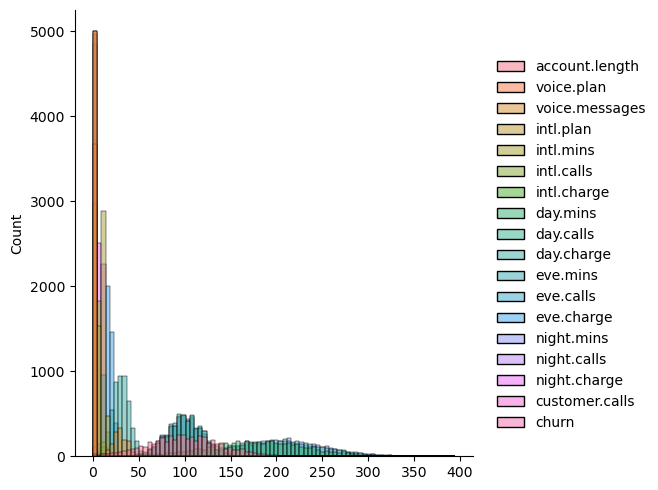

In [35]:
sns.displot(data=df)

array([[<Axes: title={'center': 'account.length'}>,
        <Axes: title={'center': 'voice.plan'}>,
        <Axes: title={'center': 'voice.messages'}>,
        <Axes: title={'center': 'intl.plan'}>],
       [<Axes: title={'center': 'intl.mins'}>,
        <Axes: title={'center': 'intl.calls'}>,
        <Axes: title={'center': 'intl.charge'}>,
        <Axes: title={'center': 'day.mins'}>],
       [<Axes: title={'center': 'day.calls'}>,
        <Axes: title={'center': 'day.charge'}>,
        <Axes: title={'center': 'eve.mins'}>,
        <Axes: title={'center': 'eve.calls'}>],
       [<Axes: title={'center': 'eve.charge'}>,
        <Axes: title={'center': 'night.mins'}>,
        <Axes: title={'center': 'night.calls'}>,
        <Axes: title={'center': 'night.charge'}>],
       [<Axes: title={'center': 'customer.calls'}>,
        <Axes: title={'center': 'churn'}>, <Axes: >, <Axes: >]],
      dtype=object)

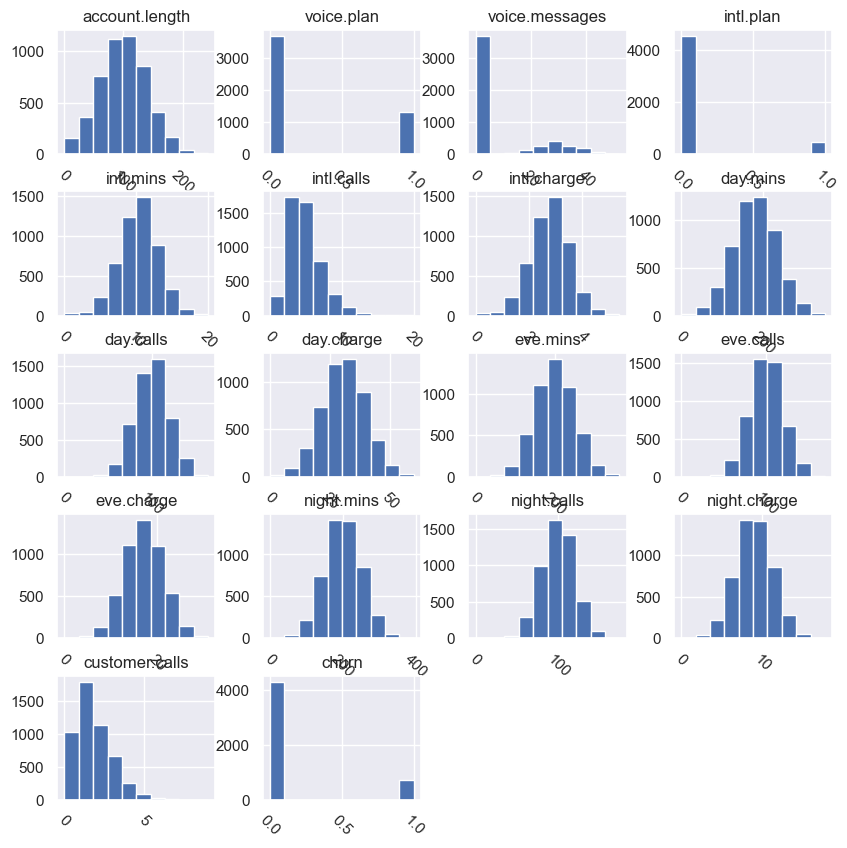

In [186]:
df.hist(figsize=(10,10),xrot=-45)

# Data Visualization for Churn Column

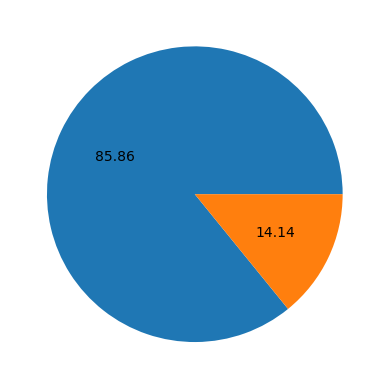

In [38]:
#imbalance Dataset
plt.pie(df['churn'].value_counts(),autopct='%.2f')
plt.show()

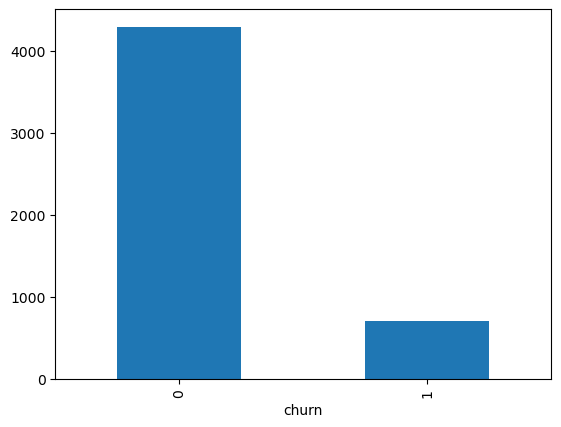

In [39]:
#barplot
value_counts = ['No','Yes']
df['churn'].value_counts().plot.bar()
plt.show()

In [40]:
# Analyzing state column
df['state'].nunique()

51

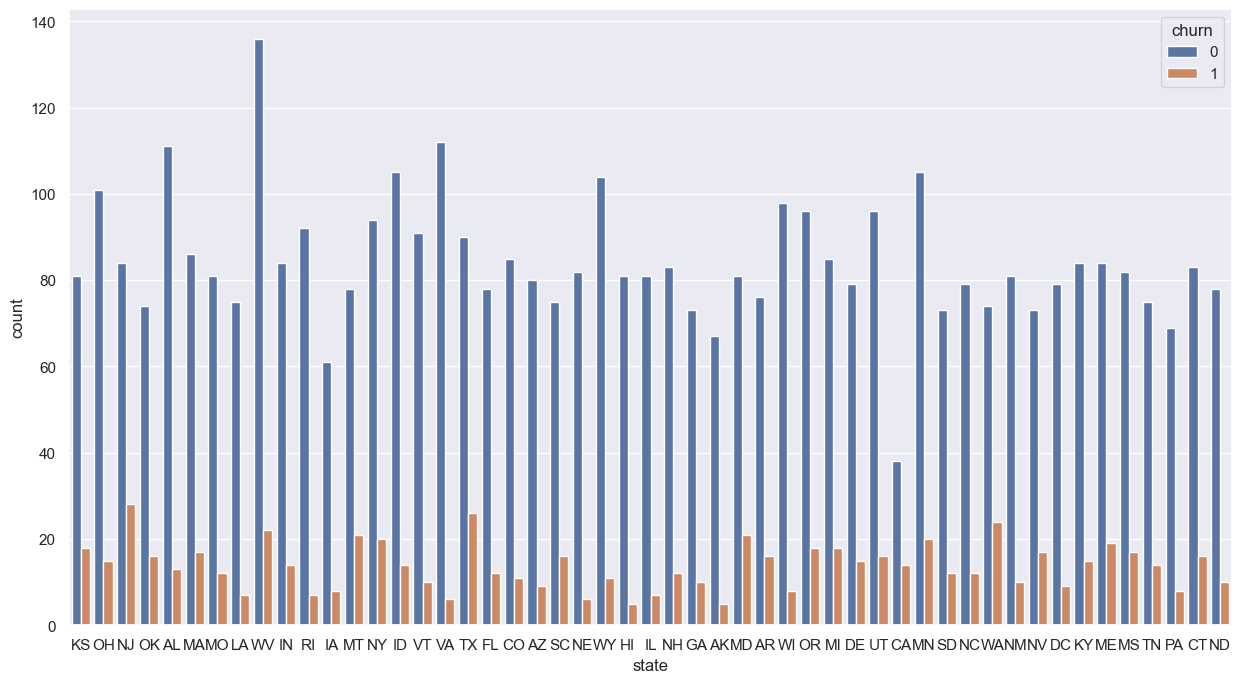

In [41]:
#comparing state & churn column using countplot
sns.set(style = "darkgrid")
plt.figure(figsize=(15,8))
ax = sns.countplot(x = 'state', hue='churn',data=df)
plt.show()

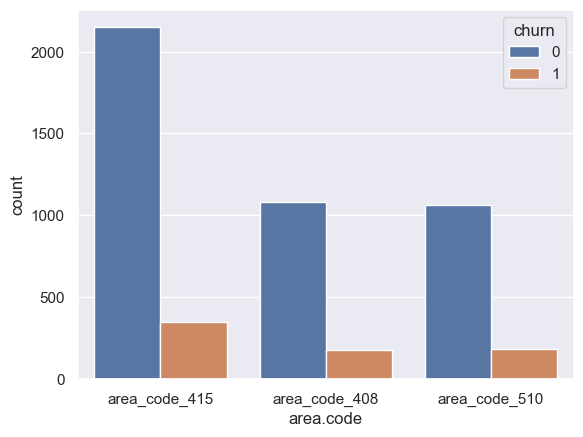

In [42]:
#comparing area code & churn column using countplot
sns.set(style = "darkgrid")
ax = sns.countplot(x ='area.code', hue="churn",data=df)
plt.show()

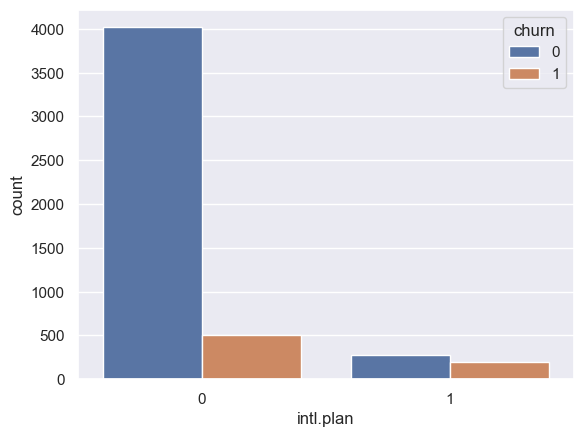

In [43]:
# analysis on international plan
sns.set(style = "darkgrid")
ax = sns.countplot(x ='intl.plan', hue="churn",data=df)
plt.show()

In [44]:
df['intl.plan'].value_counts()

intl.plan
0    4527
1     473
Name: count, dtype: int64

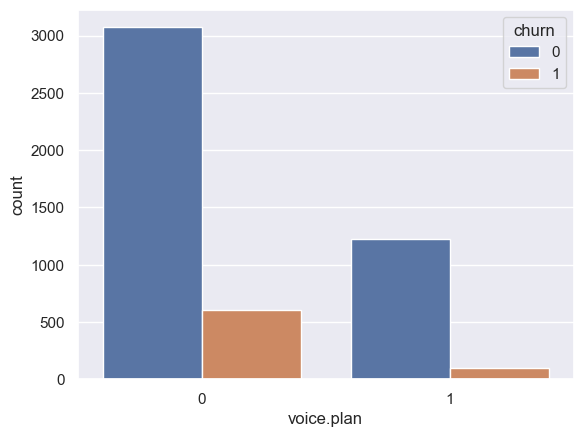

In [45]:
# analysis on voice plan column
sns.set(style = "darkgrid")
ax = sns.countplot(x ='voice.plan', hue="churn",data=df)
plt.show()

In [46]:
df['voice.plan'].value_counts()

voice.plan
0    3677
1    1323
Name: count, dtype: int64

<Axes: xlabel='customer.calls', ylabel='count'>

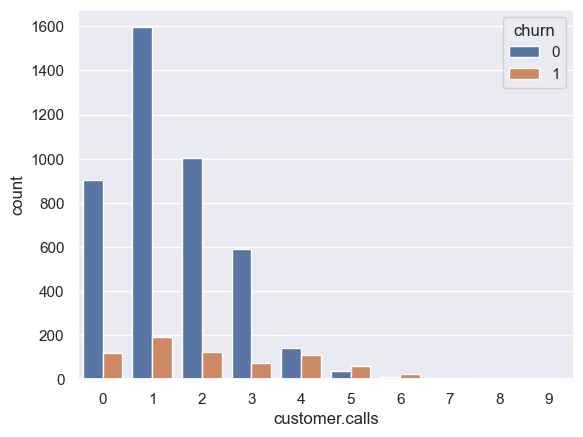

In [47]:
#Analysing using countplot
sns.countplot(x='customer.calls',hue="churn",data = df)

In [48]:
df

,state,area.code,account.length,voice.plan,voice.messages,intl.plan,intl.mins,intl.calls,intl.charge,day.mins,day.calls,day.charge,eve.mins,eve.calls,eve.charge,night.mins,night.calls,night.charge,customer.calls,churn
0,KS,area_code_415,128,1,25,0,10.0,3,2.70,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,1,0
1,OH,area_code_415,107,1,26,0,13.7,3,3.70,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,1,0
2,NJ,area_code_415,137,0,0,0,12.2,5,3.29,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,0,0
3,OH,area_code_408,84,0,0,1,6.6,7,1.78,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,2,0
4,OK,area_code_415,75,0,0,1,10.1,3,2.73,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,HI,area_code_408,50,1,40,0,9.9,5,2.67,235.7,127,40.07,223.0,126,18.96,297.5,116,13.39,2,0
4996,WV,area_code_415,152,0,0,0,14.7,2,3.97,184.2,90,31.31,256.8,73,21.83,213.6,113,9.61,3,1
4997,DC,area_code_415,61,0,0,0,13.6,4,3.67,140.6,89,23.90,172.8,128,14.69,212.4,97,9.56,1,0
4998,DC,area_code_510,109,0,0,0,8.5,6,2.30,188.8,67,32.10,171.7,92,14.59,224.4,89,10.10,0,0


<Axes: >

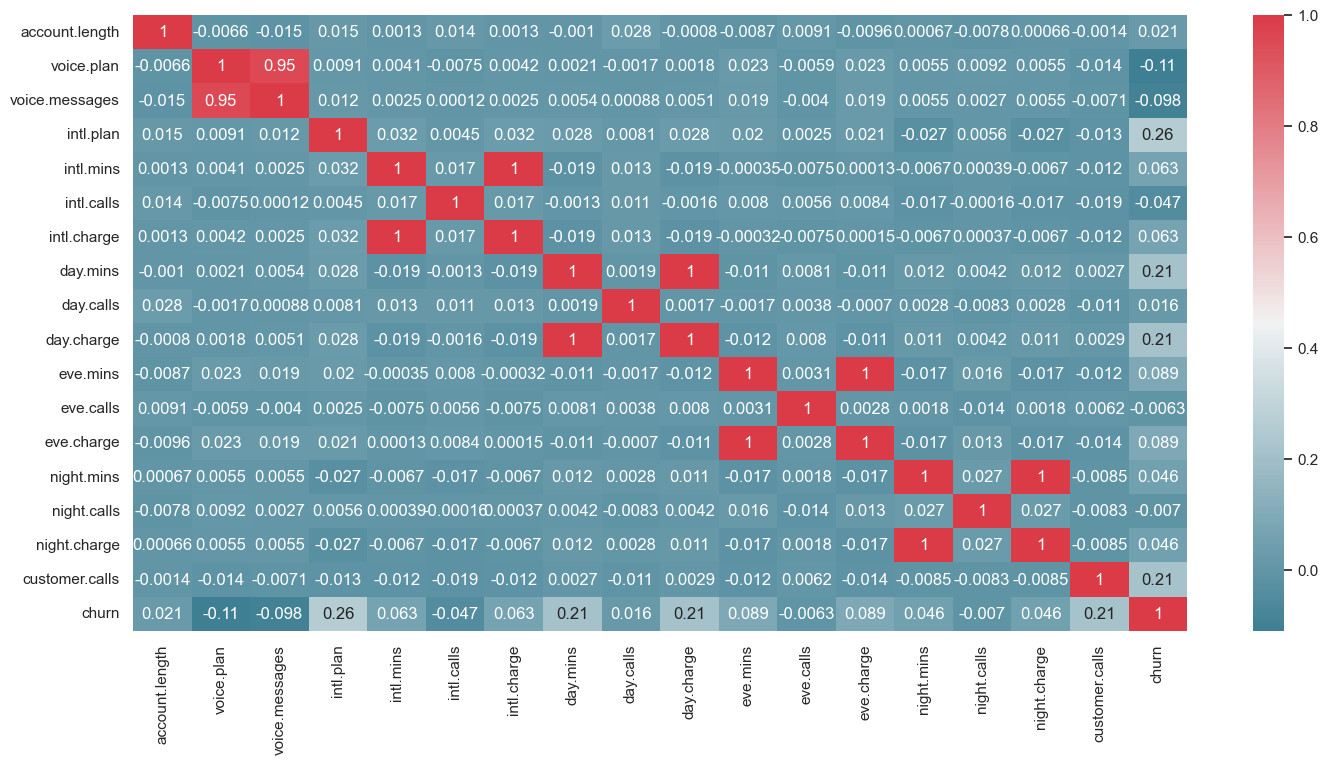

In [49]:
# plotting the corelation matrix
cmap=sns.diverging_palette(220, 10, as_cmap=True)
plt.figure(figsize=(17,8))
correlation=df.select_dtypes(include=['number']).corr()
sns.heatmap(correlation, annot=True, cmap=cmap)

<Axes: >

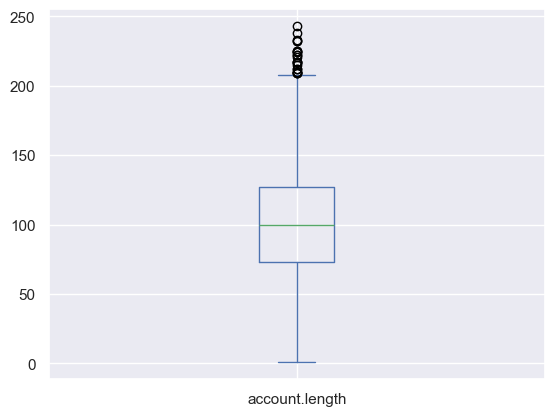

In [50]:
data_1["account.length"].plot(kind="box")

<Axes: >

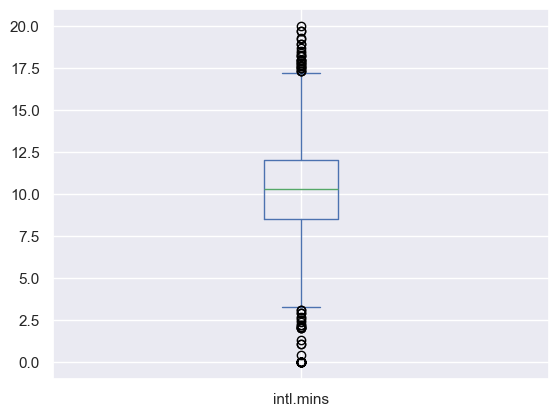

In [51]:
data_1["intl.mins"].plot(kind="box")

<Axes: >

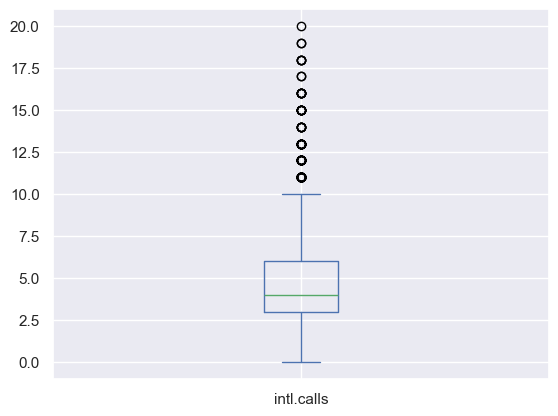

In [52]:
data_1["intl.calls"].plot(kind="box")

In [53]:
percentile25 = data_1['intl.mins'].quantile(0.25)
percentile75 = data_1['intl.mins'].quantile(0.75)
print("75th quartile: ",percentile75)
print("25th quartile: ",percentile25)
iqr = percentile75 - percentile25
print ("IQR: ",iqr)

75th quartile:  12.0
25th quartile:  8.5
IQR:  3.5


In [54]:
upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr
data_1[data_1['intl.mins'] > upper_limit]
data_1[data_1['intl.mins'] < lower_limit]

,account.length,voice.messages,intl.mins,intl.calls,intl.charge,day.mins,day.calls,day.charge,eve.mins,eve.calls,...,night.charge,customer.calls,churn,voice.plan1,voice.plan2,intl.plan1,intl.plan2,area_code_415,area_code_408,area_code_510
179,70,0,0.0,0,0.00,232.1,122,39.46,292.300000,112,...,9.05,3,0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
225,65,0,2.7,4,0.73,213.4,111,36.28,234.500000,94,...,11.25,1,0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
343,98,21,0.0,0,0.00,64.6,98,10.98,176.100000,86,...,11.02,2,0,0.0,1.0,1.0,0.0,1.0,0.0,0.0
397,94,0,2.0,2,0.54,234.4,103,39.85,279.300000,109,...,10.54,1,1,1.0,0.0,1.0,0.0,0.0,1.0,0.0
488,165,0,0.0,0,0.00,242.9,126,41.29,209.800000,65,...,10.28,1,0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
595,87,28,0.0,0,0.00,151.4,95,25.74,152.400000,97,...,11.25,1,0,0.0,1.0,1.0,0.0,1.0,0.0,0.0
712,106,0,0.0,0,0.00,114.4,104,19.45,78.300000,101,...,10.47,2,0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
762,161,0,1.3,6,0.35,189.6,78,32.23,267.400000,117,...,8.30,1,0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
878,62,0,0.0,0,0.00,281.0,66,47.77,160.600000,108,...,3.51,1,0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
1028,70,0,0.0,0,0.00,222.8,114,37.88,215.900000,113,...,10.06,1,0,1.0,0.0,1.0,0.0,0.0,1.0,0.0


In [55]:
new_data = data_1[data_1['intl.mins'] < upper_limit]
new_data.shape

(4971, 23)

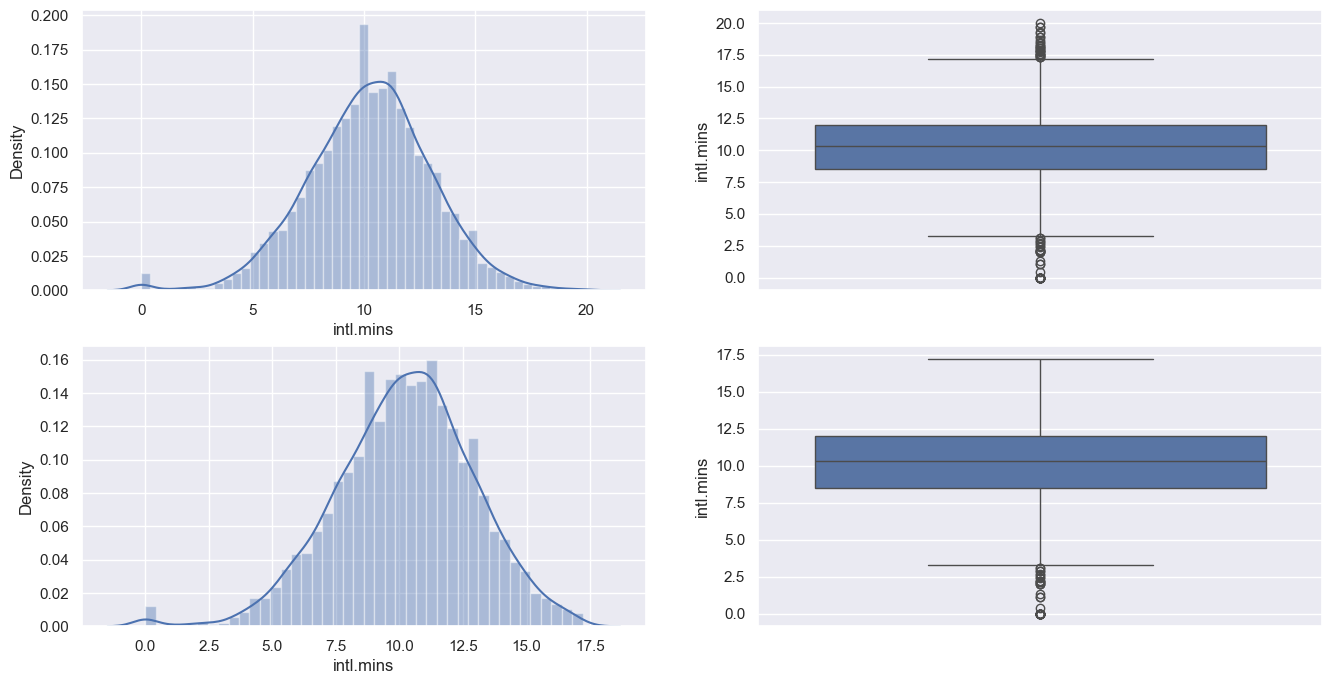

In [56]:
plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.distplot(data_1['intl.mins'])
plt.subplot(2,2,2)
sns.boxplot(data_1['intl.mins'])
plt.subplot(2,2,3)
sns.distplot(new_data['intl.mins'])
plt.subplot(2,2,4)
sns.boxplot(new_data['intl.mins'])
plt.show()

In [57]:
new_df_cap = data_1.copy()
new_df_cap['intl.mins'] = np.where(
    new_df_cap['intl.mins'] > upper_limit,
    upper_limit,
    np.where(
        new_df_cap['intl.mins'] < lower_limit,
        lower_limit,
        new_df_cap['intl.mins']
    )
)

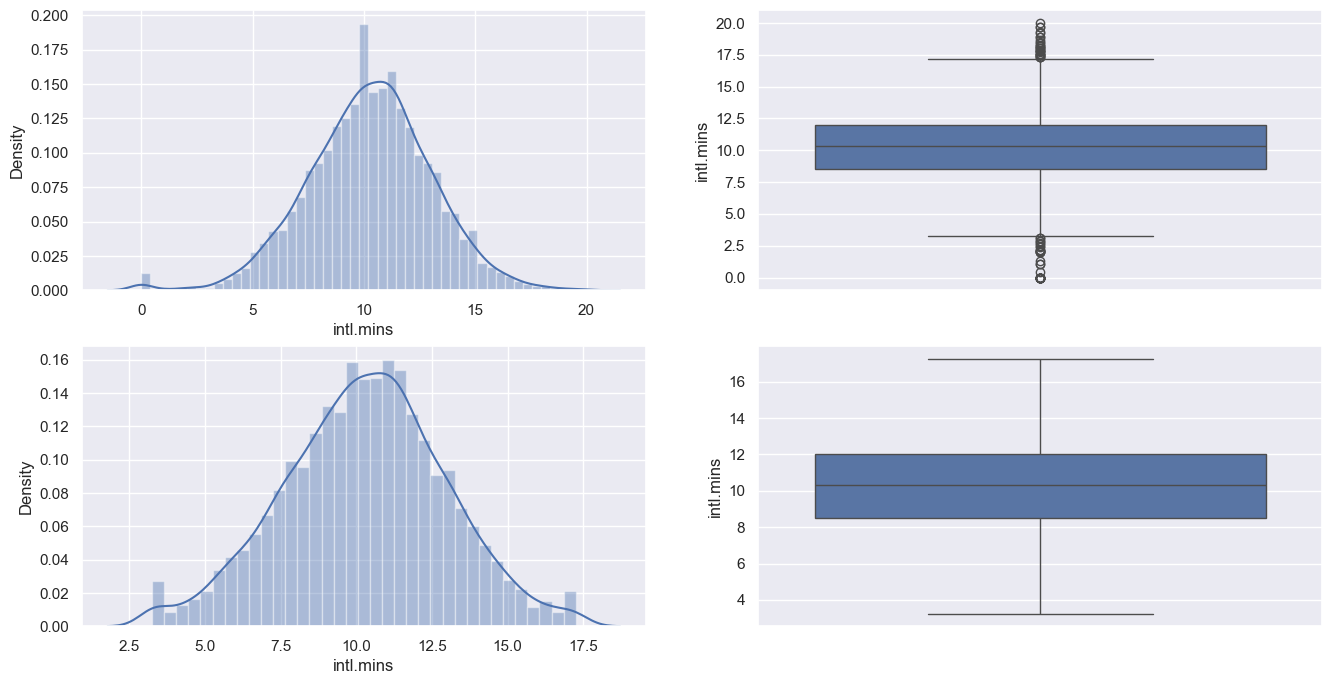

In [58]:
plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.distplot(data_1['intl.mins'])
plt.subplot(2,2,2)
sns.boxplot(data_1['intl.mins'])
plt.subplot(2,2,3)
sns.distplot(new_df_cap['intl.mins'])
plt.subplot(2,2,4)
sns.boxplot(new_df_cap['intl.mins'])
plt.show()

In [59]:
X=new_df_cap.drop('churn',axis=1)
y=new_df_cap[['churn']]
new_df_cap

,account.length,voice.messages,intl.mins,intl.calls,intl.charge,day.mins,day.calls,day.charge,eve.mins,eve.calls,...,night.charge,customer.calls,churn,voice.plan1,voice.plan2,intl.plan1,intl.plan2,area_code_415,area_code_408,area_code_510
0,128,25,10.0,3,2.70,265.1,110,45.07,197.4,99,...,11.01,1,0,0.0,1.0,1.0,0.0,0.0,1.0,0.0
1,107,26,13.7,3,3.70,161.6,123,27.47,195.5,103,...,11.45,1,0,0.0,1.0,1.0,0.0,0.0,1.0,0.0
2,137,0,12.2,5,3.29,243.4,114,41.38,121.2,110,...,7.32,0,0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
3,84,0,6.6,7,1.78,299.4,71,50.90,61.9,88,...,8.86,2,0,1.0,0.0,0.0,1.0,1.0,0.0,0.0
4,75,0,10.1,3,2.73,166.7,113,28.34,148.3,122,...,8.41,3,0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,50,40,9.9,5,2.67,235.7,127,40.07,223.0,126,...,13.39,2,0,0.0,1.0,1.0,0.0,1.0,0.0,0.0
4996,152,0,14.7,2,3.97,184.2,90,31.31,256.8,73,...,9.61,3,1,1.0,0.0,1.0,0.0,0.0,1.0,0.0
4997,61,0,13.6,4,3.67,140.6,89,23.90,172.8,128,...,9.56,1,0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
4998,109,0,8.5,6,2.30,188.8,67,32.10,171.7,92,...,10.10,0,0,1.0,0.0,1.0,0.0,0.0,0.0,1.0


# Feature Engineering

In [61]:
from sklearn.model_selection import train_test_split  

In [62]:
# Splitting the data into features and target

X = new_df_cap.drop(columns='churn') # target_column is churn
y = new_df_cap['churn']

In [63]:
# Feature Scaling 

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

In [64]:
# Train-test split(train_dataset (80%) , test_dataset (20%))

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=104)

In [65]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.preprocessing import label_binarize

# Binarize the output for ROC-AUC (if more than two classes)

if len(y.unique()) > 2:
    y_train = label_binarize(y_train, classes=range(len(y.unique())))
    y_test = label_binarize(y_test, classes=range(len(y.unique())))

# Model Building
# 1. Logistic Regression

In [67]:
# Built a logistic regression model

from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(max_iter=1000)

# Train the model using the training data.
log_reg.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [68]:
y_pred_lr = log_reg.predict(X_test)
y_pred_lr

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

# Model Evaluation

In [70]:
# Evaluate the model on the training dataset 
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve

y_pred_prob_lr = log_reg.predict_proba(X_test)[:, 1] if len(y.unique()) == 2 else log_reg.decision_function(X_test)
lr_accuracy = accuracy_score(y_test, y_pred_lr)
lr_auc = roc_auc_score(y_test, y_pred_prob_lr, multi_class='ovr')
print("Accuracy:", lr_accuracy)
print("ROC-AUC Score:", lr_auc)
print("Classification_report:", classification_report(y_test, y_pred_lr))
print("Confusion_matrix:", confusion_matrix(y_test, y_pred_lr))

Accuracy: 0.868
ROC-AUC Score: 0.845482541962863
Classification_report:               precision    recall  f1-score   support

           0       0.88      0.98      0.93       859
           1       0.60      0.20      0.30       141

    accuracy                           0.87      1000
   macro avg       0.74      0.59      0.61      1000
weighted avg       0.84      0.87      0.84      1000

Confusion_matrix: [[840  19]
 [113  28]]


In [71]:
# Logistic Regression with Hyperparameter Tuning

from sklearn.model_selection import GridSearchCV

param_grid_lr = {'C': [0.01, 0.1, 1, 10, 100]}
grid_lr = GridSearchCV(LogisticRegression(max_iter=1000), param_grid_lr, cv=5, scoring='accuracy')
grid_lr.fit(X_train, y_train)
log_reg_best = grid_lr.best_estimator_

y_pred_lr = log_reg_best.predict(X_test)
print("Best Parameters:", grid_lr.best_params_)
print("Accuracy:", lr_accuracy)

Best Parameters: {'C': 0.1}
Accuracy: 0.868


In [72]:
# Cross-validation for logistic regression 

from sklearn.model_selection import cross_val_score

cv_scores_lr = cross_val_score(log_reg, X, y, cv=5, scoring='accuracy')
print("Cross-Validation Accuracy:", cv_scores_lr.mean())

Cross-Validation Accuracy: 0.8634000000000001


# 2. Random Forest Classifier

In [74]:
# Built a random forest classifier

from sklearn.ensemble import RandomForestClassifier
rf_clf = RandomForestClassifier(random_state=104)

# Train the model using the training data.
rf_clf.fit(X_train, y_train)

RandomForestClassifier(random_state=104)

In [75]:
y_pred_rf = rf_clf.predict(X_test)
y_pred_rf

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,

# Model Evaluation

In [77]:
# Evaluate the model on the training dataset 

y_pred_prob_rf = rf_clf.predict_proba(X_test)[:, 1] if len(y.unique()) == 2 else rf_clf.predict_proba(X_test)
rf_accuracy = accuracy_score(y_test, y_pred_rf)
rf_auc = roc_auc_score(y_test, y_pred_prob_rf, multi_class='ovr')
print("Accuracy:", rf_accuracy)
print("ROC-AUC Score:", rf_auc)
print("Classification_report:", classification_report(y_test, y_pred_rf))
print("Confusion_matrix: ", confusion_matrix(y_test, y_pred_rf))

Accuracy: 0.951
ROC-AUC Score: 0.9307540518002956
Classification_report:               precision    recall  f1-score   support

           0       0.96      0.99      0.97       859
           1       0.90      0.73      0.81       141

    accuracy                           0.95      1000
   macro avg       0.93      0.86      0.89      1000
weighted avg       0.95      0.95      0.95      1000

Confusion_matrix:  [[848  11]
 [ 38 103]]


In [78]:
# Random Forest Classifier with Hyperparameter Tuning

rf_clf = RandomForestClassifier(random_state=104)
param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}
grid_rf = GridSearchCV(rf_clf, param_grid_rf, cv=5, scoring='accuracy')
grid_rf.fit(X_train, y_train)
rf_best_model = grid_rf.best_estimator_
print("Best Parameters:", grid_rf.best_params_)
print("Accuracy:", rf_accuracy)

Best Parameters: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 50}
Accuracy: 0.951


In [79]:
# Cross-validation for logistic regression 

from sklearn.model_selection import cross_val_score

cv_scores_rcf = cross_val_score(rf_clf, X, y, cv=5, scoring='accuracy')
print("Cross-Validation Accuracy:", cv_scores_rcf.mean())

Cross-Validation Accuracy: 0.9564


# 3. Naive Bayes

In [81]:
from sklearn.naive_bayes import GaussianNB
nb=GaussianNB()
nb.fit(X_train,y_train)

GaussianNB()

In [82]:
y_pred_nb = nb.predict(X_test)
y_pred_nb

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,

# Model Evaluation

In [84]:
# Evaluate a model on the trained dataset
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

y_pred_prob_nb = nb.predict_proba(X_test)[:, 1] if len(y.unique()) == 2 else knn.predict_proba(X_test)
nb_accuracy = accuracy_score(y_test, y_pred_nb)
nb_auc = roc_auc_score(y_test, y_pred_prob_nb, multi_class='ovr')
ROC_AUC = nb_auc
print("Accuracy:", nb_accuracy)
print("ROC-AUC Score:", nb_auc)
print("confusion_matrix:", confusion_matrix(y_test, y_pred_nb))
print("classification_report:", classification_report(y_test, y_pred_nb))

Accuracy: 0.872
ROC-AUC Score: 0.8750815313864877
confusion_matrix: [[794  65]
 [ 63  78]]
classification_report:               precision    recall  f1-score   support

           0       0.93      0.92      0.93       859
           1       0.55      0.55      0.55       141

    accuracy                           0.87      1000
   macro avg       0.74      0.74      0.74      1000
weighted avg       0.87      0.87      0.87      1000



In [85]:
# Hyperparameter tuning for Guassian Naives Bayes

nb = GaussianNB()

params_NB = {'var_smoothing': np.logspace(0,-9, num=100)}
grid_nb = GridSearchCV(estimator=nb, param_grid=params_NB, cv=5, scoring='accuracy')
grid_nb.fit(X_train, y_train)
nb_best_model = grid_nb.best_estimator_
print("Best Parameters:", grid_nb.best_params_)
print("Accuracy:", nb_accuracy)

Best Parameters: {'var_smoothing': 0.01}
Accuracy: 0.872


In [86]:
#  Guassin Naive Bayes with Cross-Validation

cv_scores_nb = cross_val_score(nb, X, y, cv=5, scoring='accuracy')
print("Cross-Validation Accuracy:", cv_scores_nb.mean())
print("Test Accuracy:", nb_accuracy)

Cross-Validation Accuracy: 0.8620000000000001
Test Accuracy: 0.872


# 4. Decision Tree

In [88]:
from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier()
dtc.fit(X_train,y_train)

DecisionTreeClassifier()

In [89]:
y_pred_dt=dtc.predict(X_test)
y_pred_dt

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,

# Model Evaluation

In [91]:
# Evaluate the model on the training dataset 

y_pred_prob_dt = dtc.predict_proba(X_test)[:, 1] if len(y.unique()) == 2 else dtc.predict_proba(X_test)
dt_accuracy = accuracy_score(y_test, y_pred_dt)
dt_auc = roc_auc_score(y_test, y_pred_prob_dt, multi_class='ovr')
print("Accuracy:", dt_accuracy)
print("ROC-AUC Score:", dt_auc)
print("Classification_report:", classification_report(y_test, y_pred_dt))
print("Confusion_matrix: ", confusion_matrix(y_test, y_pred_dt))

Accuracy: 0.912
ROC-AUC Score: 0.8183604554198765
Classification_report:               precision    recall  f1-score   support

           0       0.95      0.95      0.95       859
           1       0.69      0.69      0.69       141

    accuracy                           0.91      1000
   macro avg       0.82      0.82      0.82      1000
weighted avg       0.91      0.91      0.91      1000

Confusion_matrix:  [[815  44]
 [ 44  97]]


In [92]:
# Decision Tree with Hyperparameter Tuning

from sklearn.model_selection import GridSearchCV
param_grid = {
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
dtc=DecisionTreeClassifier()
grid_dt = GridSearchCV(dtc, param_grid, cv=5, scoring='accuracy')
grid_dt.fit(X_train, y_train)
dtc_best = grid_dt.best_estimator_

y_pred_dt = dtc_best.predict(X_test)
print("Best Parameters:", grid_dt.best_params_)
print("Accuracy:", dt_accuracy)

Best Parameters: {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 10}
Accuracy: 0.912


In [93]:
# Cross-validation for DecisionTreeClassifier 

from sklearn.model_selection import cross_val_score

cv_scores_dt = cross_val_score(dtc, X, y, cv=5, scoring='accuracy')
print("Cross-Validation Accuracy:", cv_scores_dt.mean())

Cross-Validation Accuracy: 0.9186


# Model Comparison

In [95]:
# Comparison of Models

print("\nComparison of Model Accuracies:")
model_comparison = pd.DataFrame({
    'Model': ['Logistic Regression', 'Random Forest','Naive Bayes', 'Decision Tree'],
    'Accuracy': [lr_accuracy, rf_accuracy,nb_accuracy, dt_accuracy]
})
print(model_comparison)


Comparison of Model Accuracies:
                 Model  Accuracy
0  Logistic Regression     0.868
1        Random Forest     0.951
2          Naive Bayes     0.872
3        Decision Tree     0.912


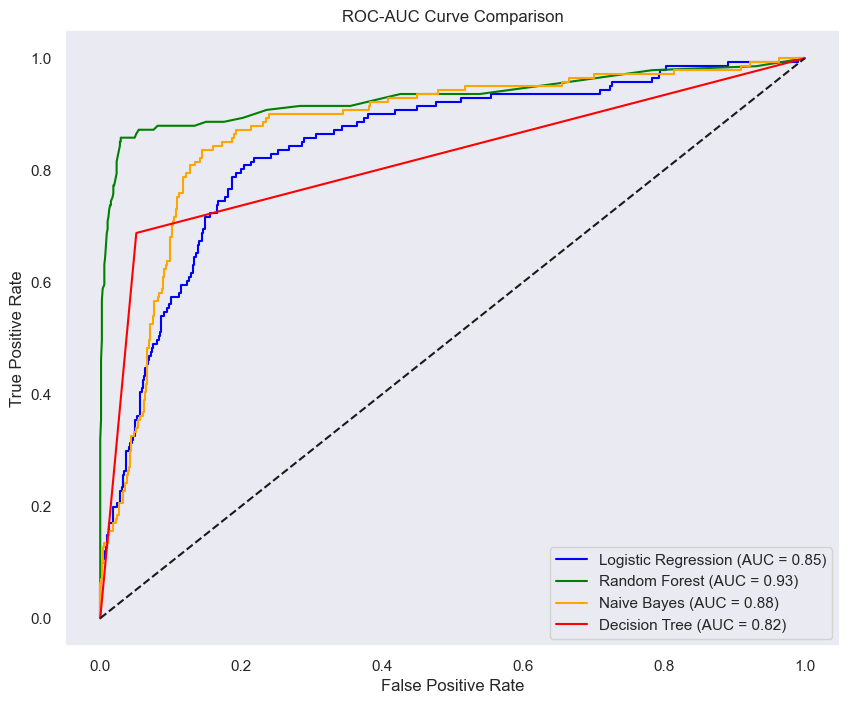

In [96]:
# ROC-AUC Curves

plt.figure(figsize=(10, 8))
def plot_roc_curve(model_name, y_test, y_pred_prob, color):
    fpr, tpr, _ = roc_curve(y_test, y_pred_prob) if len(y.unique()) == 2 else roc_curve(y_test.ravel(), y_pred_prob.ravel())
    plt.plot(fpr, tpr, label=f'{model_name} (AUC = {roc_auc_score(y_test, y_pred_prob):.2f})', color=color)

plot_roc_curve("Logistic Regression", y_test, y_pred_prob_lr, 'blue')
plot_roc_curve("Random Forest", y_test, y_pred_prob_rf, 'green')
plot_roc_curve("Naive Bayes", y_test, y_pred_prob_nb, 'orange')
plot_roc_curve("Decision Tree", y_test, y_pred_prob_dt, 'red')

plt.plot([0, 1], [0, 1], 'k--')
plt.title('ROC-AUC Curve Comparison')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.grid()
plt.show()

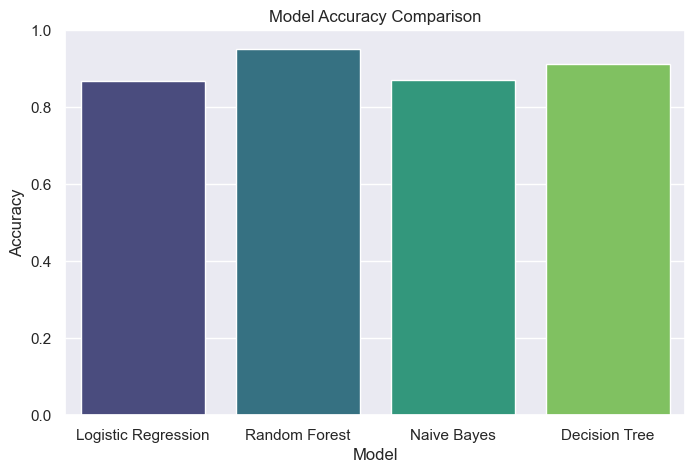

In [97]:
# Plot the comparison

plt.figure(figsize=(8, 5))
sns.barplot(x='Model', y='Accuracy', data=model_comparison, palette='viridis')
plt.title('Model Accuracy Comparison')
plt.ylabel('Accuracy')
plt.xlabel('Model')
plt.ylim(0, 1)
plt.show()